# Arbol

### Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from joblib import dump, load

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree

In [3]:
from preprocessing import reemplazarNulls,reemplazarCategoricas,reemplazarFechas,targetBooleano

[###] All Done                                              


In [4]:
from utilities import score, df_feat, df_targ, train_val

### Codigo a correr

In [5]:
MAX_JOBS = 5

**Run :** Entrenar Nuevamente o Cargar Entrenado

In [6]:
runSimple = True
runValidated = True
runDouble = True

**Save :** Guardar Modelo (pisa anterior)

In [7]:
saveSimple = True
saveValidated = True
saveDouble = True

### Preprocesamiento

In [8]:
targetBooleano(df_targ, inplace=True)
reemplazarNulls(df_feat , inplace=True)
reemplazarCategoricas(df_feat , inplace=True)
reemplazarFechas(df_feat , inplace=True)

,id,direccion_viento_tarde,direccion_viento_temprano,horas_de_sol,humedad_tarde,humedad_temprano,llovieron_hamburguesas_hoy,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,...,rafaga_viento_max_velocidad,temp_max,temp_min,temperatura_tarde,temperatura_temprano,velocidad_viendo_tarde,velocidad_viendo_temprano,y,m,d
0,74816,247.5,225.0,0.0,78.0,74.0,True,4.0,68.0,7.0,...,48.0,17.9,11.6,17.2,14.8,26.0,17.0,2014,6,7
1,64318,202.5,0.0,0.0,14.0,56.0,True,4.0,5.8,1.0,...,61.0,41.8,22.0,40.2,28.1,31.0,11.0,2014,12,7
2,54357,90.0,90.0,2.6,79.0,47.0,False,4.0,0.0,8.0,...,57.0,19.0,3.1,15.9,13.7,33.0,19.0,2010,7,8
3,1762,337.5,247.5,0.0,92.0,96.0,True,3.0,5.0,8.0,...,54.0,21.5,19.3,19.2,19.4,31.0,13.0,2015,11,4
4,89422,45.0,22.5,0.0,14.0,37.0,False,4.0,0.0,2.0,...,50.0,35.7,18.4,34.8,26.9,19.0,13.0,2014,12,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102351,49272,157.5,90.0,6.5,63.0,44.0,False,3.8,0.4,6.0,...,72.0,20.5,9.6,13.8,14.6,37.0,20.0,2012,5,23
102352,13885,270.0,315.0,2.1,65.0,80.0,True,1.6,5.2,7.0,...,48.0,15.4,8.9,14.3,11.8,31.0,30.0,2011,10,25
102353,4586,247.5,337.5,0.0,81.0,62.0,False,4.0,0.0,7.0,...,35.0,17.9,9.6,15.3,14.6,2.0,6.0,2015,12,16
102354,68030,45.0,67.5,0.9,79.0,65.0,False,2.2,0.0,8.0,...,56.0,12.8,5.9,9.8,9.6,24.0,17.0,2010,8,18


In [9]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102356 entries, 0 to 102355
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            102356 non-null  int64  
 1   direccion_viento_tarde        102356 non-null  float64
 2   direccion_viento_temprano     102356 non-null  float64
 3   horas_de_sol                  102356 non-null  float64
 4   humedad_tarde                 102356 non-null  float64
 5   humedad_temprano              102356 non-null  float64
 6   llovieron_hamburguesas_hoy    102356 non-null  bool   
 7   mm_evaporados_agua            102356 non-null  float64
 8   mm_lluvia_dia                 102356 non-null  float64
 9   nubosidad_tarde               102356 non-null  float64
 10  nubosidad_temprano            102356 non-null  float64
 11  presion_atmosferica_tarde     102356 non-null  float64
 12  presion_atmosferica_temprano  102356 non-nul

In [10]:
train_feat, val_feat, train_targ, val_targ = train_val( df_feat, df_targ )

## Entrenamiento

### Simple

In [11]:
if (runSimple):
    arbol_simple = DecisionTreeClassifier(
        random_state=1,
        max_depth=3,
        min_samples_split=200
    )
    arbol_simple.fit( train_feat, train_targ.llovieron_hamburguesas_al_dia_siguiente )
    
    # Guardar
    if(saveSimple):
        dump(arbol_simple, 'models/Tree/arbol_simple.sk') 
else:
    # Cargar
    arbol_simple = load('models/Tree/arbol_simple.sk')

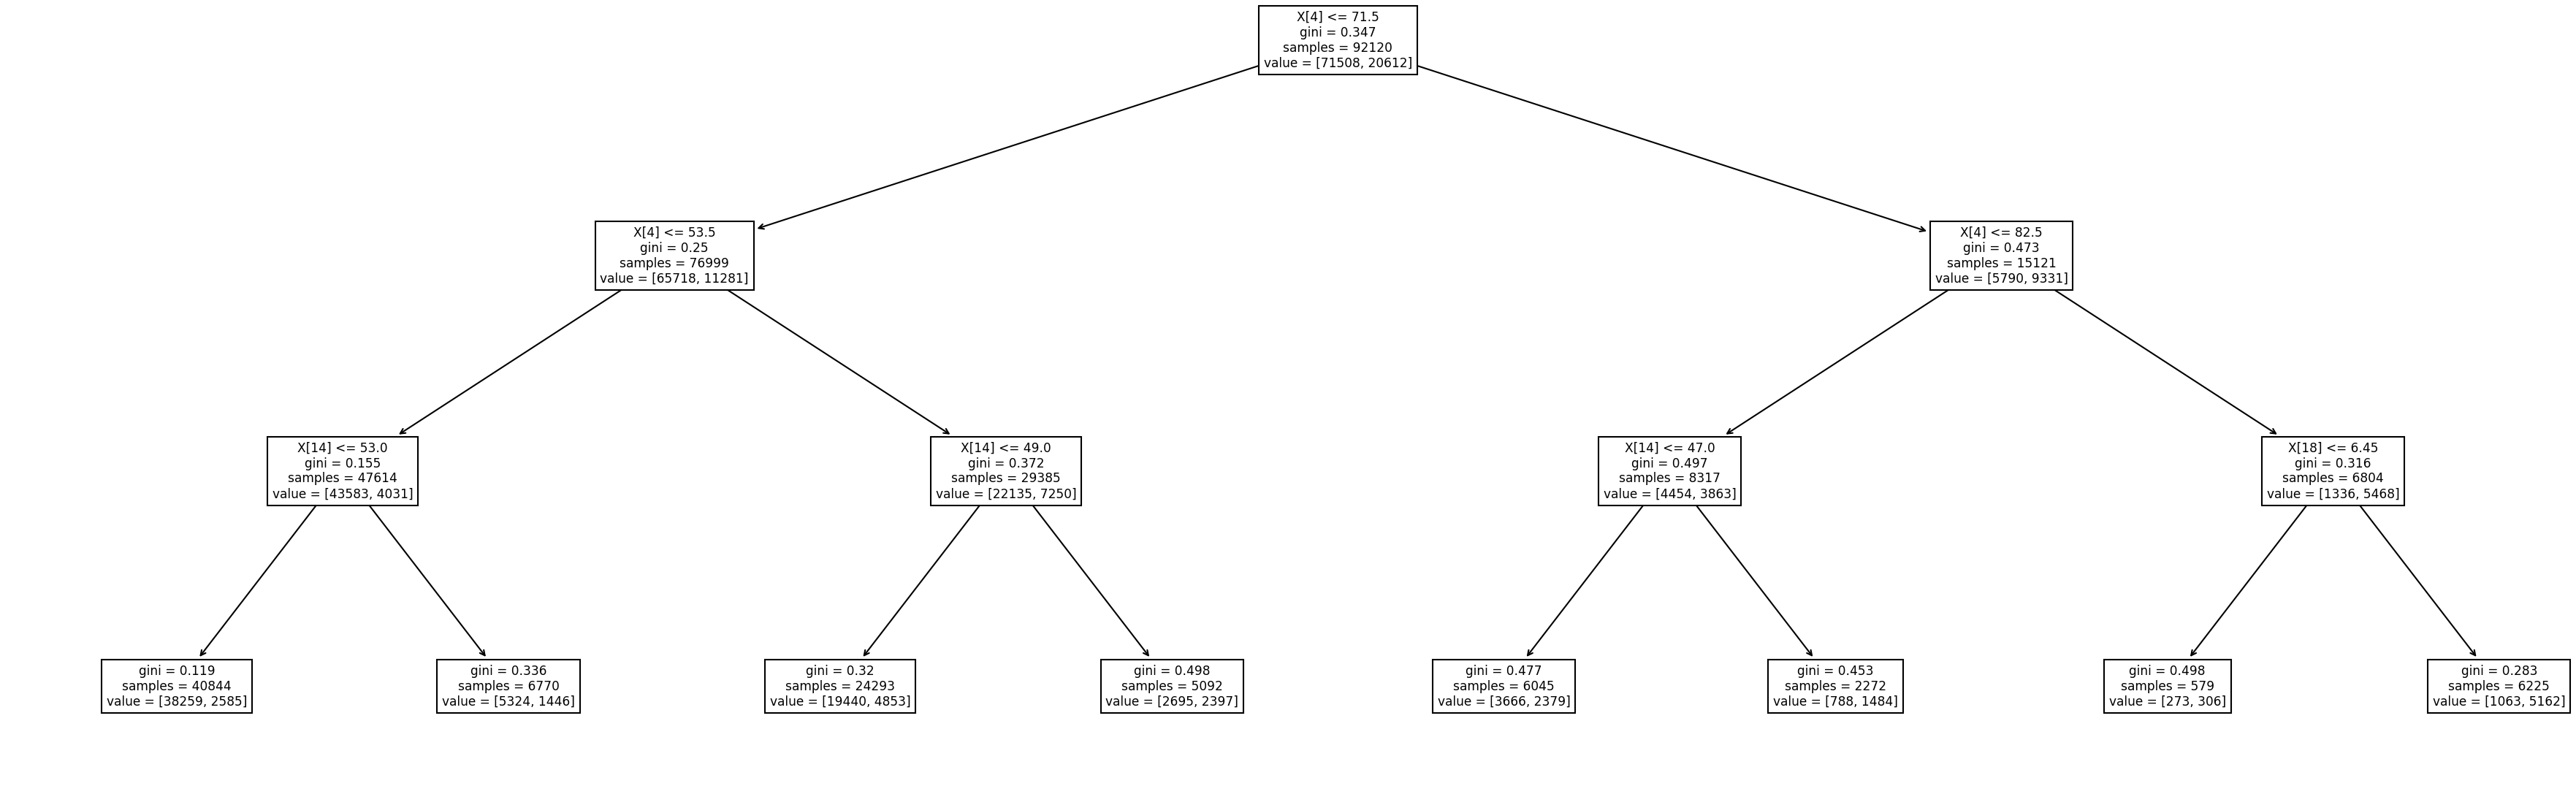

In [12]:
plt.figure(dpi=150,figsize=(15, 5))
tree.plot_tree(arbol_simple);

In [13]:
%time
pred = arbol_simple.predict(val_feat)
score(pred, val_targ.llovieron_hamburguesas_al_dia_siguiente)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs
ACCURACY: 0.8228800312622118


### Validado

In [14]:
if( runValidated ):
    arbol = DecisionTreeClassifier(random_state=1)
    params = {'max_depth': np.arange(1, 20, 1), 'min_samples_leaf': np.arange(50, 1000, 50)}
    
    gridSearch = GridSearchCV(
        arbol,
        params,
        scoring='accuracy',
        n_jobs=MAX_JOBS,
        return_train_score=True,
        verbose=1
    ).fit(train_feat, train_targ.llovieron_hamburguesas_al_dia_siguiente)
    
    # Guardar
    if(saveValidated):
        dump(gridSearch, 'models/Tree/gridSearch.sk')
else:
    # Cargar
    gridSearch = load('models/Tree/gridSearch.sk')

Fitting 5 folds for each of 361 candidates, totalling 1805 fits


In [15]:
print(f"Best score: {gridSearch.best_score_}")
print(f"Best params {gridSearch.best_params_}")

Best score: 0.8405775075987842
Best params {'max_depth': 12, 'min_samples_leaf': 100}


In [16]:
arbol_grid = gridSearch.best_estimator_

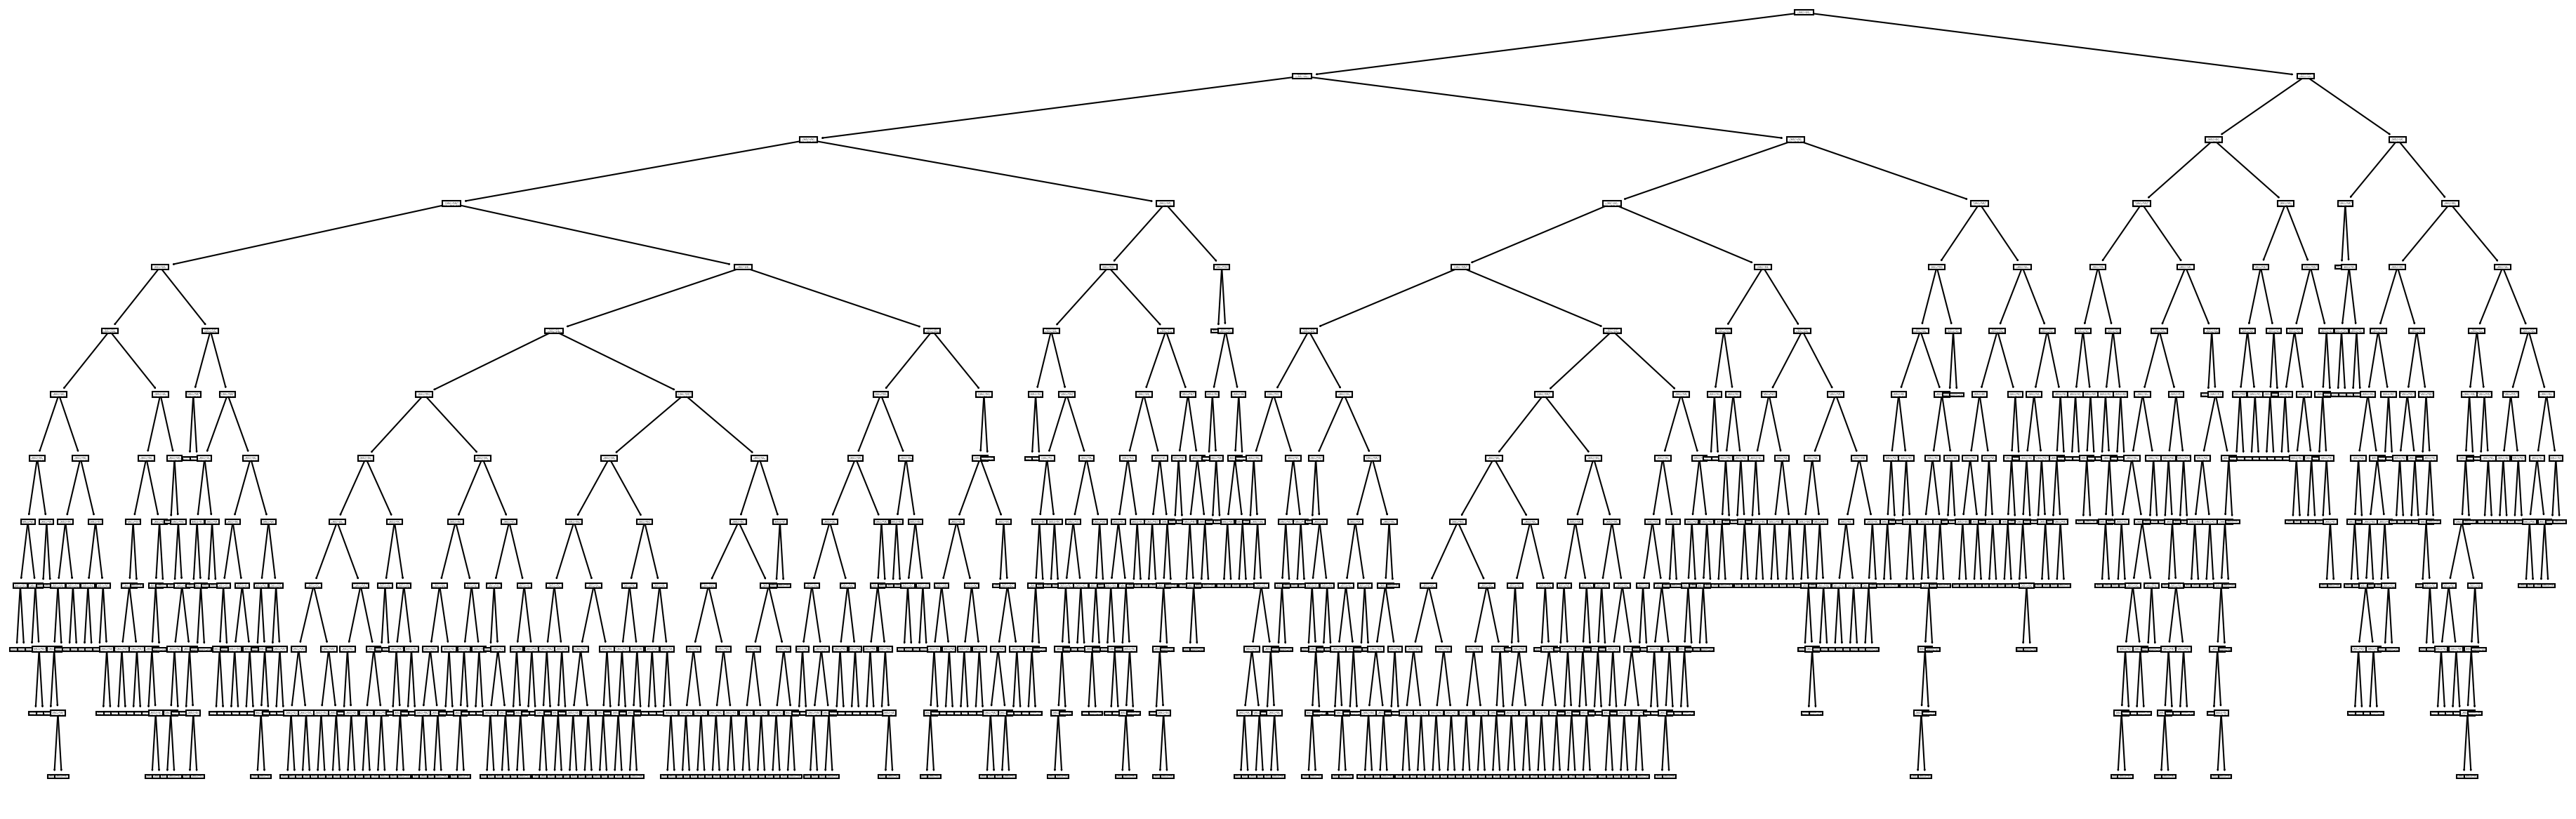

In [17]:
plt.figure(dpi=150,figsize=(15, 5))
tree.plot_tree(arbol_grid);

In [18]:
%time
pred = arbol_grid.predict(val_feat)
score(pred, val_targ.llovieron_hamburguesas_al_dia_siguiente)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
ACCURACY: 0.8352872215709262


### Mas Fino

In [19]:
if( runDouble ):
    arbol = DecisionTreeClassifier(random_state=1)
    params = {'max_depth': np.arange(8, 12, 1), 'min_samples_leaf': np.arange(50, 150, 10)}
    
    randomSearch = RandomizedSearchCV(
        arbol,
        params,
        scoring='accuracy',
        n_jobs=MAX_JOBS,
        return_train_score=True,
        verbose=1
    ).fit(train_feat, train_targ.llovieron_hamburguesas_al_dia_siguiente)
    
    # Guardar
    if(saveDouble):
        dump(gridSearch, 'models/Tree/randomSearch.sk')
else:
    # Cargar
    gridSearch = load('models/Tree/randomSearch.sk')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [20]:
print(f"Best score: {randomSearch.best_score_}")
print(f"Best params {randomSearch.best_params_}")

Best score: 0.8407837603126357
Best params {'min_samples_leaf': 120, 'max_depth': 10}


In [21]:
arbol_rand = randomSearch.best_estimator_

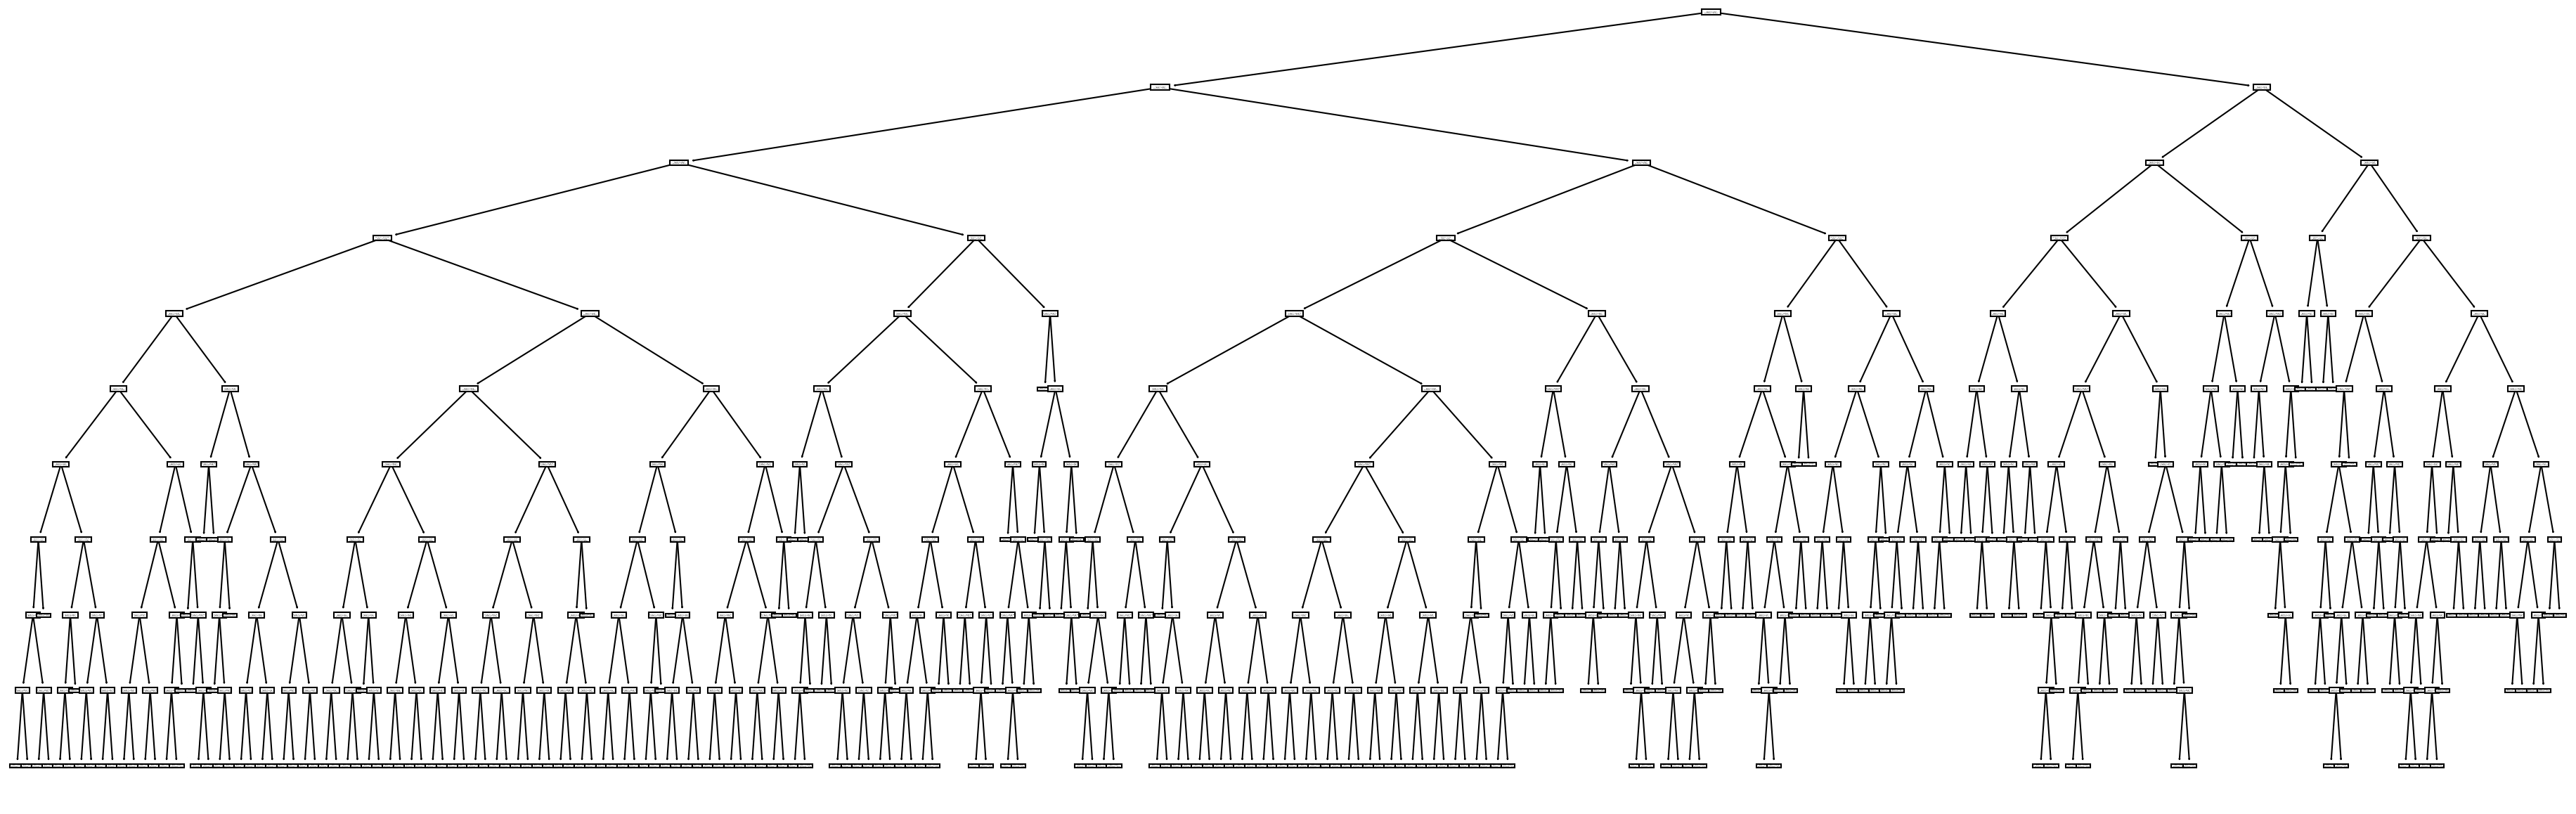

In [22]:
plt.figure(dpi=150,figsize=(15, 5))
tree.plot_tree(arbol_rand);

In [23]:
%time
pred = arbol_rand.predict(val_feat)
score(pred, val_targ.llovieron_hamburguesas_al_dia_siguiente)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs
ACCURACY: 0.834798749511528


## Resultados

**Simple:** \
ACCURACY: 0.8283246707569659

**Grid:** \
Best score: 0.8396869725200906 \
Best params {'max_depth': 10, 'min_samples_leaf': 100}

**Random:** \
Best score: 0.8397358187715639 \
Best params {'min_samples_leaf': 60, 'max_depth': 9}

#### Conclusion

Se obtuvieron mejores metricas usando grid search & random search, ademas de estar validando con k-folds. \
No hay mucha diferencia entre estas dos, ni en metricas ni complejidad. \
Exportamos el modelo de grid search porque sus hiperparametros son 'redondos'

In [24]:
arbol = arbol_grid
dump(arbol, 'models/Tree/tree.sk')

['models/Tree/tree.sk']